In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = pd.read_csv(
    filepath_or_buffer="./data/winequality-red.csv",
)
data.sample(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1080,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6
72,7.7,0.69,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.5,5
1116,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
1499,6.9,0.74,0.03,2.3,0.054,7.0,16.0,0.99508,3.45,0.63,11.5,6
741,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,5


In [53]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

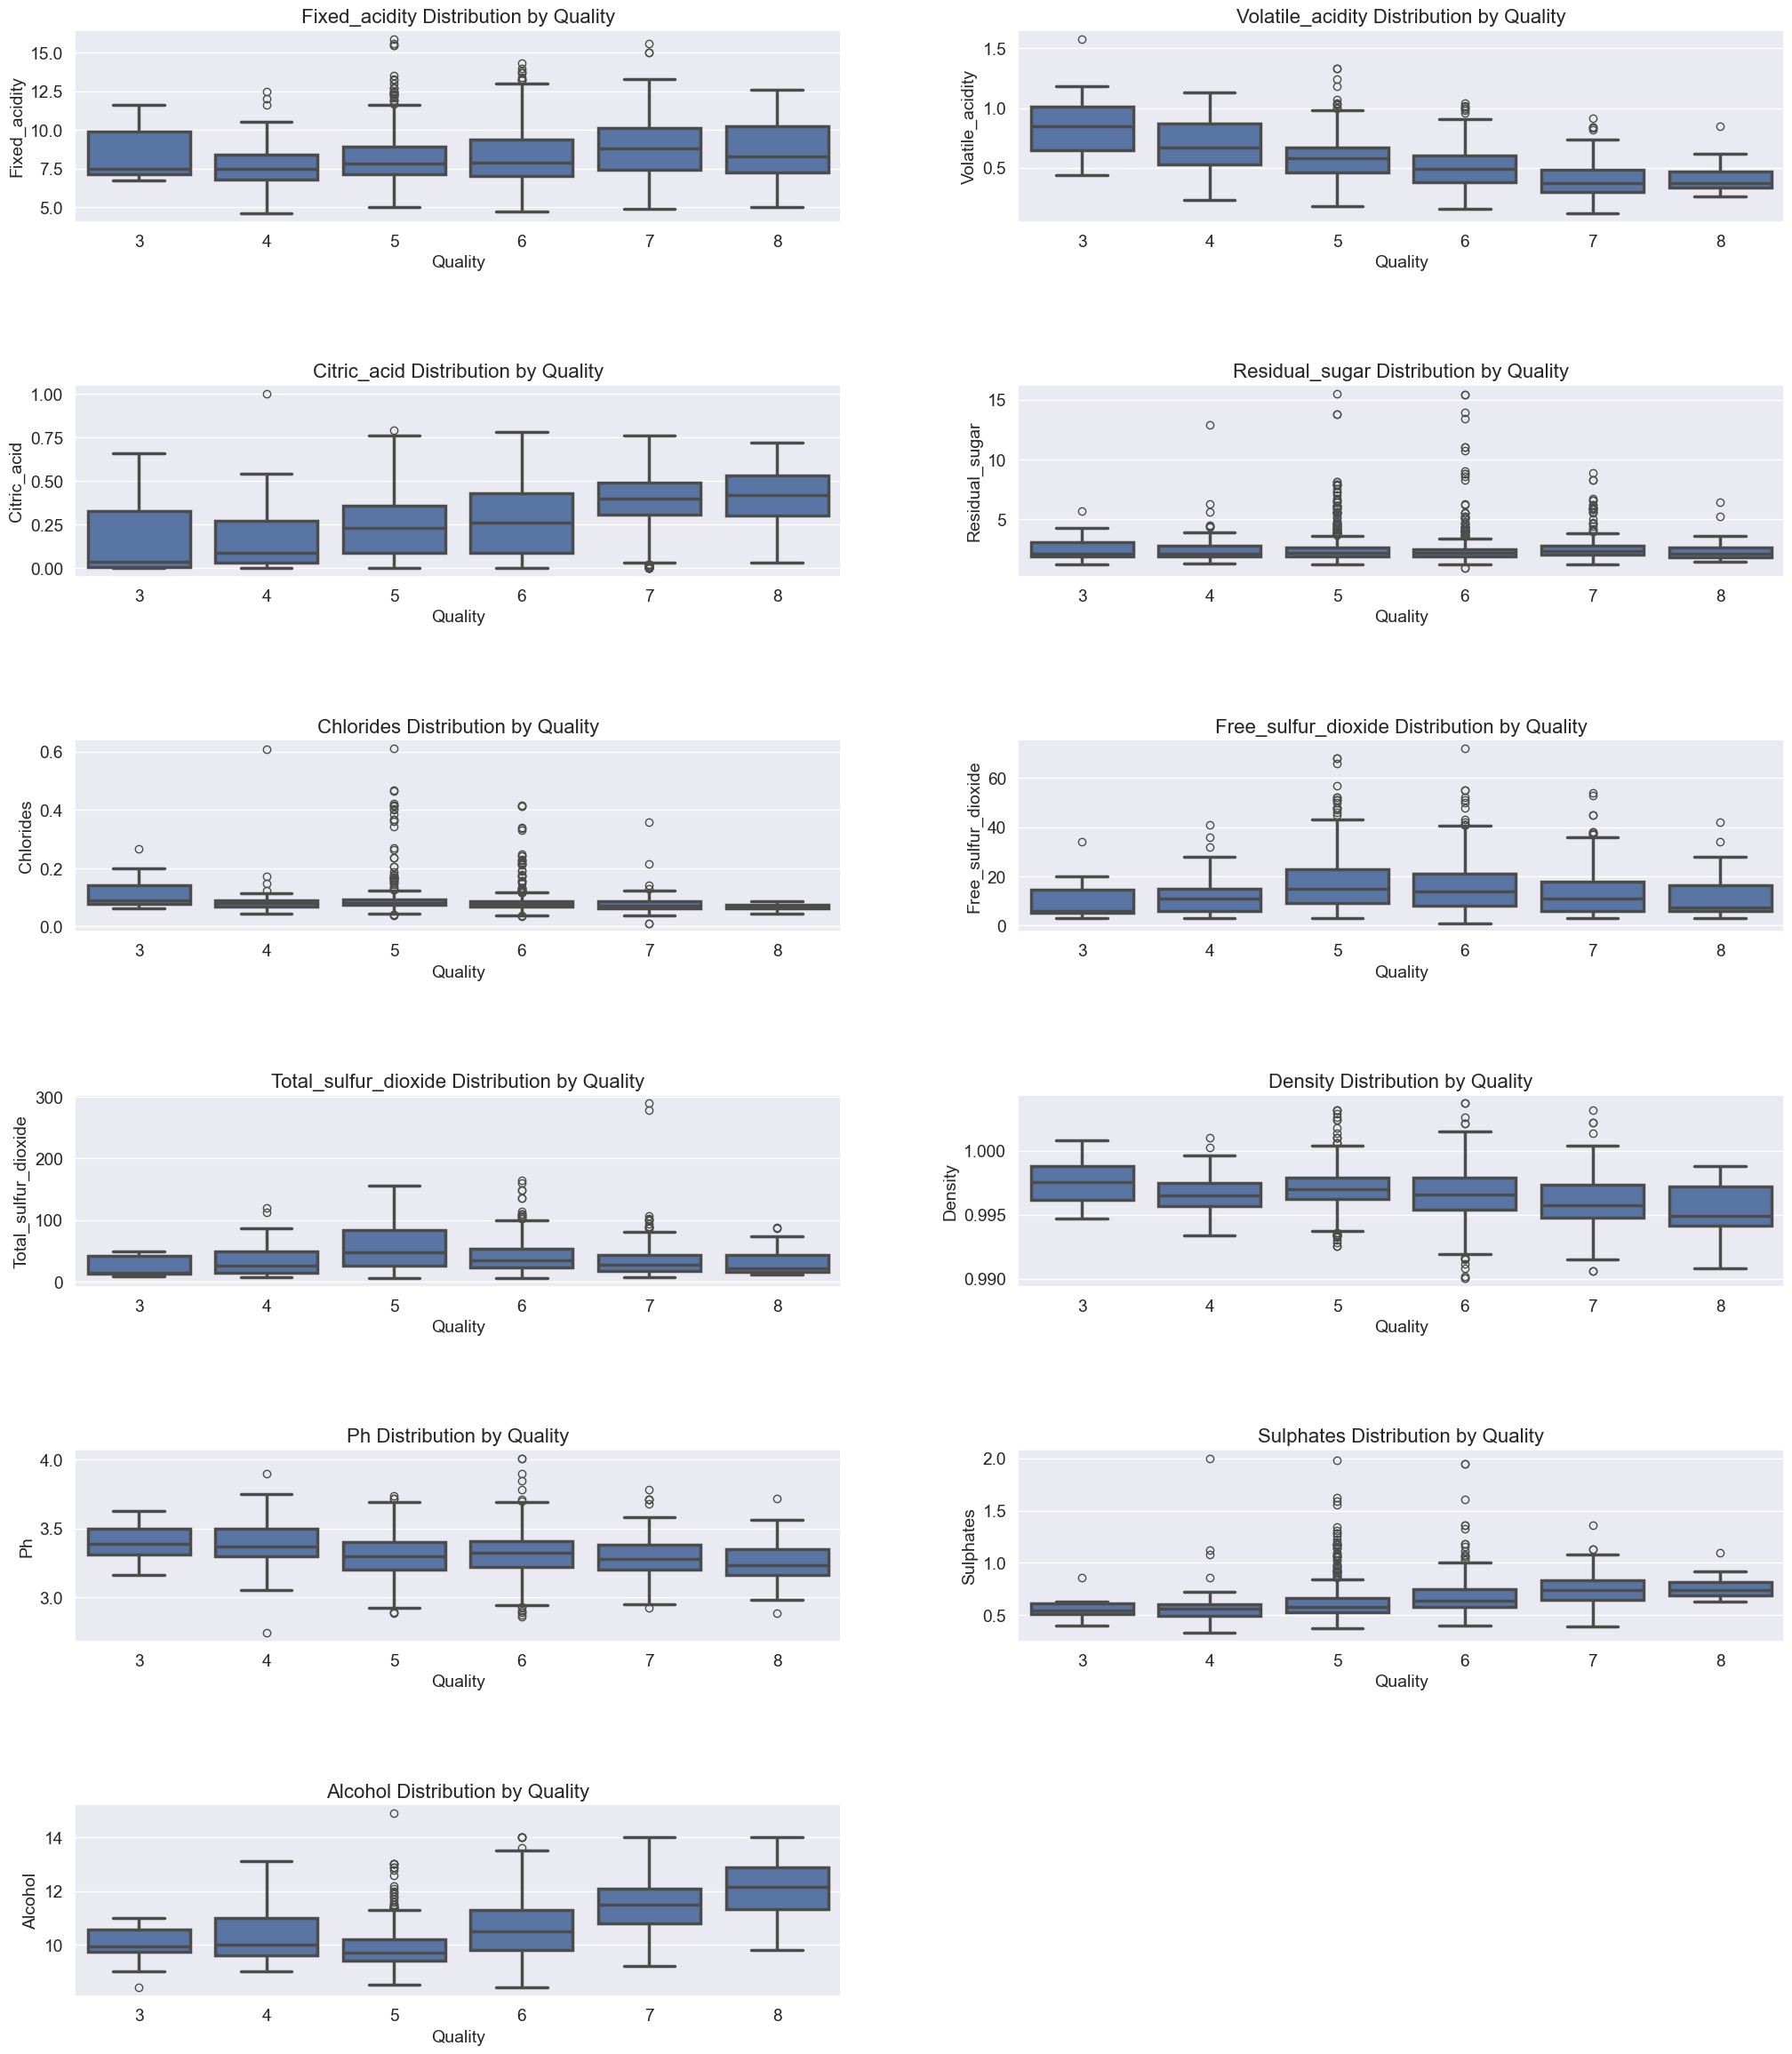

In [54]:
plt.figure(figsize=(22, 25))



columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',

           'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',

           'pH', 'sulphates', 'alcohol']



for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.boxplot(x='quality', y=columns[i-1], data=data, linewidth=2.5, fliersize=6)

    plt.title(f'{columns[i-1].capitalize()} Distribution by Quality', fontsize=16)

    plt.xlabel('Quality', fontsize=14)

    plt.ylabel(columns[i-1].capitalize(), fontsize=14)



plt.tight_layout(pad=5.0)

plt.show()

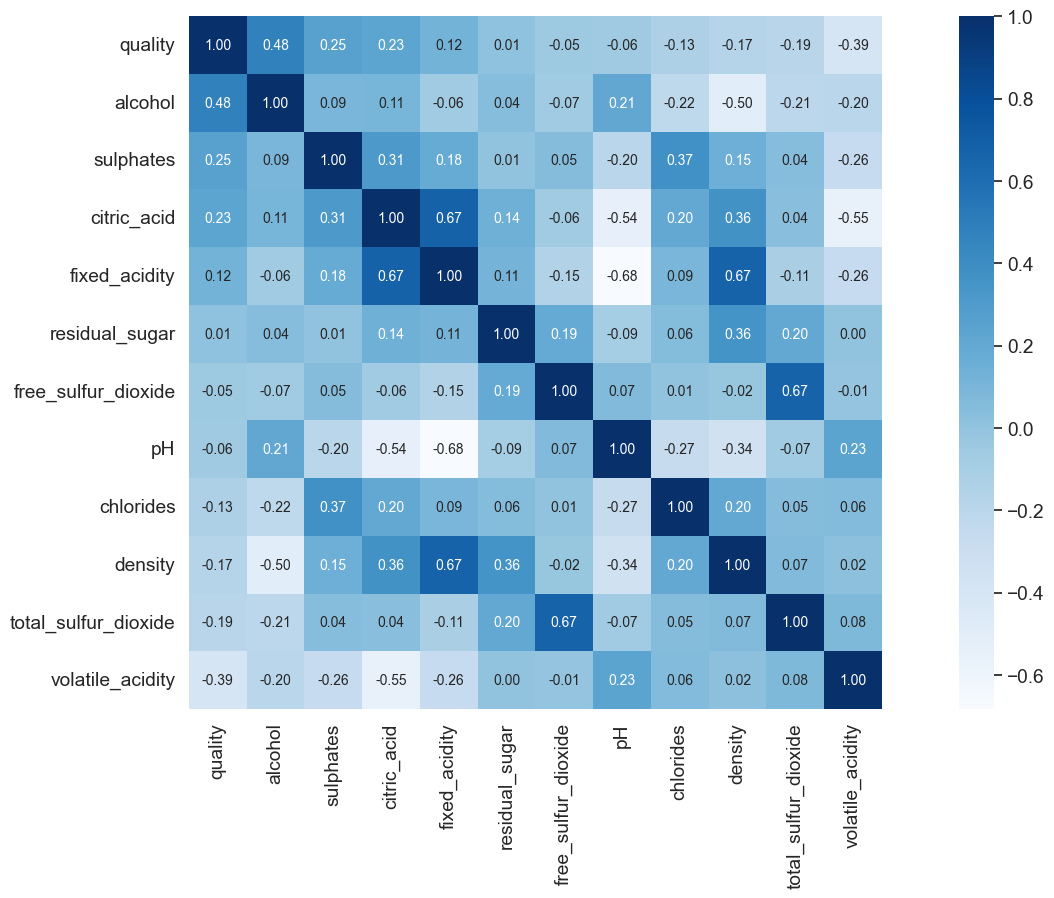

In [55]:
corr = data.corr()
plt.figure(figsize=(20, 9))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [56]:
data[columns] = data[columns].apply(np.log1p)

In [57]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [58]:
bins = (2, 5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [59]:
encoder = LabelEncoder()
data['quality'] = encoder.fit_transform(data['quality'])
data['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [60]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis=1),
                                                    data['quality'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [61]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = model.predict(X_test)

In [64]:
#print accuracy
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7345844504021448
0.7541666666666667


In [65]:
import pickle

In [66]:
with open(file="lr.pkl", mode="wb") as lr_file:
    pickle.dump(obj=model, file=lr_file)

In [67]:
with open(file="lr.pkl", mode="rb") as lr_file:
    lr_loaded = pickle.load(file=lr_file)
    print(lr_loaded)

LogisticRegression()


In [68]:
with open(file="lr.pkl", mode="rb") as lr_file:
    lr_loaded = pickle.load(file=lr_file)
    print(lr_loaded)

LogisticRegression()


In [69]:
lr_loaded.score(X=X_test, y=y_test)

0.7541666666666667

In [70]:
data.drop('quality', axis=1).columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [71]:
with open(file="le.pkl", mode="wb") as le_file:
    pickle.dump(obj=encoder, file=le_file)

In [72]:
with open(file="le.pkl", mode="rb") as le_file:
    le_loaded = pickle.load(file=le_file)

In [73]:
with open(file="ss.pkl", mode="wb") as ss_file:
    pickle.dump(obj=scaler, file=ss_file)

In [74]:
with open(file="ss.pkl", mode="rb") as ss_file:
    ss_loaded = pickle.load(file=ss_file)

In [75]:
# Check the accuracy of the loaded model
y_pred_loaded = lr_loaded.predict(X_test)
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))

Accuracy of loaded model: 0.7541666666666667


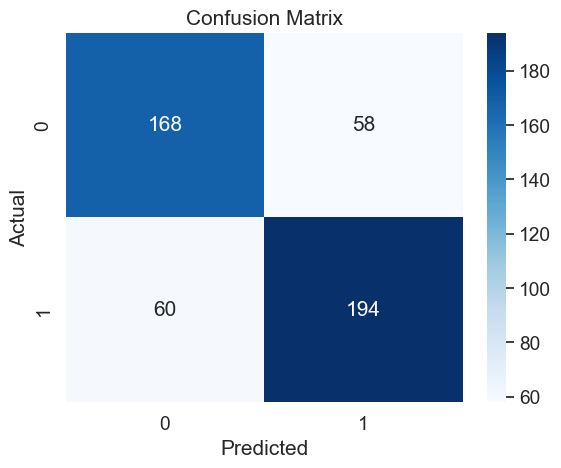

In [76]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # Changed matplotliplt to matplotlib.pyplot

# cm = confusion_matrix(y_test, y_pred.numpy()) # Convert y_pred to numpy array
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()